In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import getpass
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

from metric_learn import NCA
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

from tqdm import tqdm

username = getpass.getuser()
sys.path.append(f'../')

from src.support_models import MetricLearner

In [3]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=3000, n_features=768, n_informative=20,
                           n_classes=3, n_clusters_per_class=5, random_state=0)

X, X_test, Y, y_test = train_test_split(X, Y, test_size=0.7)
X.shape, Y.shape

((900, 768), (900,))

In [4]:
X

array([[-1.21408498,  0.32040789,  1.05570489, ..., -0.70645696,
         0.39286945,  1.04472498],
       [ 1.56399976, -0.14974081, -1.02791463, ..., -0.72538977,
         2.14253387, -0.3277779 ],
       [-0.0852497 ,  1.36814186,  0.15080104, ...,  0.77772557,
         0.39917213, -0.69259327],
       ...,
       [ 0.90613438,  0.67003841,  0.99072134, ...,  0.89585187,
        -0.82587336, -2.26504584],
       [-1.23966035,  1.78999328, -0.72215499, ...,  0.33258322,
         0.46490791, -0.67858235],
       [ 1.04873717, -0.27724522,  1.18642577, ...,  1.34143343,
         0.70821042, -2.52248585]])

# Fits and plots

In [16]:
def scatter(x, labels, title, subtitle=None):
    palette = np.array(sns.color_palette("hls", 4))
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0,alpha = 0.5, s=40, c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    plt.title(title)

(900, 2) (900,)


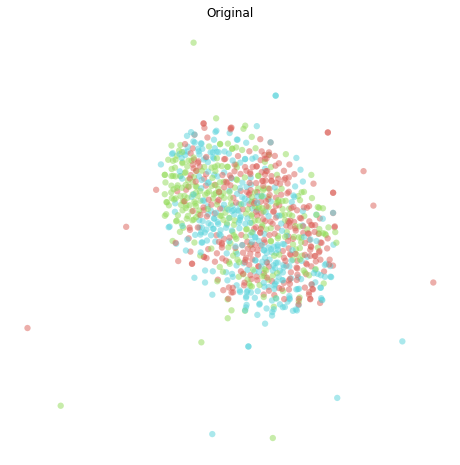

In [17]:
tsne = TSNE()
X_orig = tsne.fit_transform(X)
print(X_orig.shape, Y.shape)
scatter(X_orig, Y, 'Original')

with: 0.5355555555555556
without: 0.54


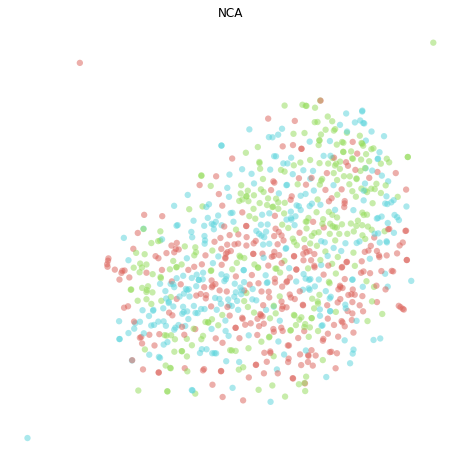

In [7]:
mlearner = MetricLearner('NCA')
X_transformed = mlearner.fit_transform(X, Y)

tsne = TSNE()
try:
    X_reduced = tsne.fit_transform(X_transformed)
except ValueError as e:
    print(mltool_name, e)
#print(X_reduced.shape, Y.shape)

clf = make_pipeline(MetricLearner('NCA'), KNeighborsClassifier())
print('with:', cross_val_score(clf, X, Y).mean())

clf = KNeighborsClassifier()
print('without:', cross_val_score(clf, X, Y).mean())

scatter(X_reduced, Y, "NCA")

# Visualization

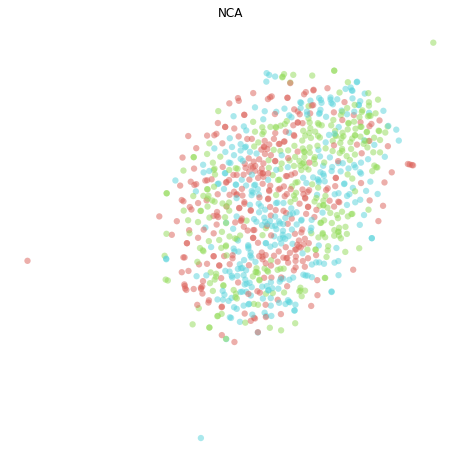

In [8]:
mlearner = MetricLearner('NCA')
mlearner.fit(X, Y)
X_transformed = mlearner.transform(X)
tsne = TSNE()
X_reduced = tsne.fit_transform(X_transformed)
scatter(X_reduced, Y, "NCA")

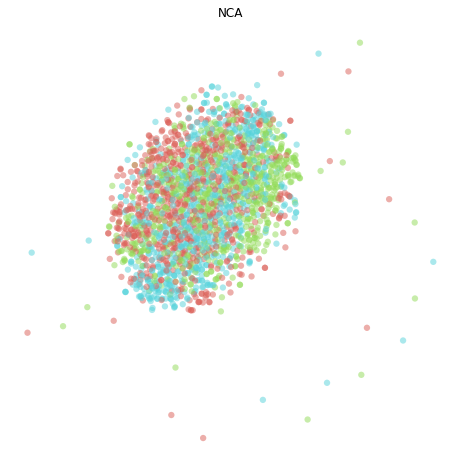

In [9]:
X_transformed = mlearner.transform(X_test)
tsne = TSNE()
X_reduced = tsne.fit_transform(X_transformed)
scatter(X_reduced, y_test, "NCA")

In [13]:
mlearner = MetricLearner('sieamese')
mlearner.fit(X, Y)
X_train = mlearner.transform(X)
X_test = mlearner.transform(X_test)

Epoch 1/20
20/20 [==============================] - 17s 750ms/step - loss: 0.4751
Epoch 2/20
20/20 [==============================] - 17s 846ms/step - loss: 0.4814
Epoch 3/20
20/20 [==============================] - 17s 832ms/step - loss: 0.4180
Epoch 4/20
20/20 [==============================] - 16s 816ms/step - loss: 0.4468
Epoch 5/20
20/20 [==============================] - 17s 828ms/step - loss: 0.3976
Epoch 6/20
20/20 [==============================] - 17s 863ms/step - loss: 0.3995
Epoch 7/20
20/20 [==============================] - 17s 856ms/step - loss: 0.3556
Epoch 8/20
20/20 [==============================] - 17s 855ms/step - loss: 0.3507
Epoch 9/20
20/20 [==============================] - 17s 866ms/step - loss: 0.3100
Epoch 10/20
20/20 [==============================] - 17s 842ms/step - loss: 0.2806
Epoch 11/20
20/20 [==============================] - 17s 865ms/step - loss: 0.3142
Epoch 12/20
20/20 [==============================] - 17s 848ms/step - loss: 0.3101
Epoch 13/20
2

NameError: name 'X_transformed' is not defined

In [18]:
tsne = TSNE()
try:
    X_reduced = tsne.fit_transform(X_train)
except ValueError as e:
    print(mltool_name, e)

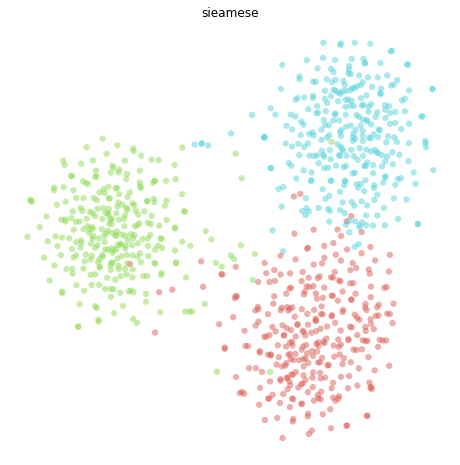

In [22]:
X_reduced = tsne.fit_transform(X_train)
scatter(X_reduced, Y, "sieamese")

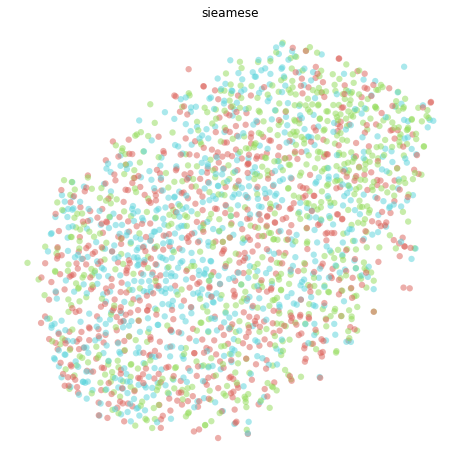

In [25]:
X_reduced = tsne.fit_transform(mlearner.transform(X_test))
scatter(X_reduced, y_test, "sieamese")

In [26]:
clf = KNeighborsClassifier()
print('with train:', cross_val_score(clf, X_train, Y).mean())

clf = KNeighborsClassifier()
print('with test:', cross_val_score(clf, X_test, y_test).mean())

with train: 0.9511111111111111
with test: 0.39380952380952383
